# TITANIC ANALYSIS

#### Introduction to the Titanic Dataset

#### The dataset provided encapsulates vital information regarding passengers aboard the Titanic, one of the most infamous maritime tragedies in history. This dataset holds valuable insights into the passengers' demographics, their accommodation on the ship, and crucially, their survival outcomes.

#### Column Explanations:

#### PassengerId: Unique identification number assigned to each passenger.
#### Survived: Indicates whether the passenger survived (1) or did not survive (0).
#### Pclass: Represents the passenger's ticket class (1st, 2nd, or 3rd).
#### Name: Full name of the passenger.
#### Sex: Gender of the passenger.
#### Age: Age of the passenger in years.
#### SibSp: Denotes the number of siblings/spouses aboard the Titanic.
#### Parch: Denotes the number of parents/children aboard the Titanic.
#### Ticket: Ticket number.
#### Fare: Fare paid for the ticket.
#### Cabin: Cabin number occupied by the passenger.
#### Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). 

#### From this dataset, i will be analyzing
#### * Survival Analysis
#### * Age and Survival
#### * Ticket Fare and Survival
#### * Port of Embarkation
#### * Family Size
#### * Cabin and Deck Information
#### * Name Analysis:
#### * Missing Data Analysis:
#### * Survival Over Time
#### * Interaction Effects


### Importing libraries

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading datasets

In [66]:
df=pd.read_csv(r'C:\Users\Han\Documents\titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Showing information of the datasets

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Checking for null values

In [37]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Fill the null value

In [38]:
df['Age']= df['Age'].fillna(df['Age'].mean()).round(4)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.6991,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0000,0,0,111369,30.0000,C148,C


In [39]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.6991,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0000,0,0,111369,30.0000,C148,C


In [70]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Survival Analysis

#### a. What was the overall survival rate on the Titanic?

In [40]:
survived_passengers = df[df['Survived'] == 1]
survival_rate = len(survived_passengers) / len(df) * 100
print(f"The overall survival rate on the Titanic was {survival_rate:.2f}%")


The overall survival rate on the Titanic was 38.38%


#### b. Did passengers in certain classes have a higher chance of survival?

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


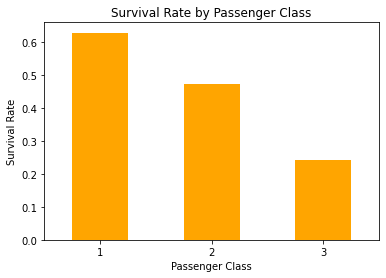

In [41]:
class_survival_rates = df.groupby('Pclass')['Survived'].mean()
print(class_survival_rates)
class_survival_rates.plot(kind='bar', color='orange')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

#### c. Did gender play a role in survival rates?

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


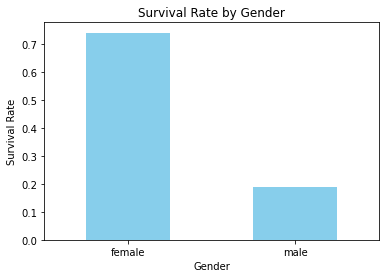

In [42]:
gender_survival_rates = df.groupby('Sex')['Survived'].mean()
print(gender_survival_rates)
gender_survival_rates.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

#### d. Were passengers with siblings or spouses more likely to survive?

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64


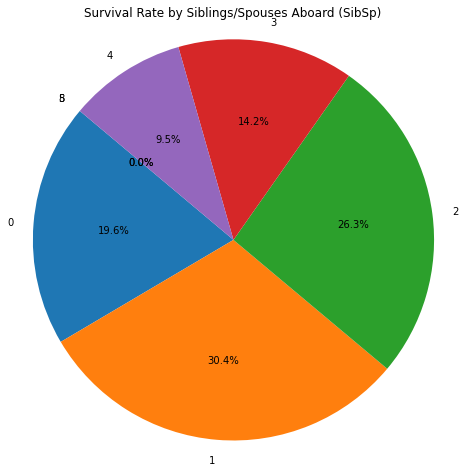

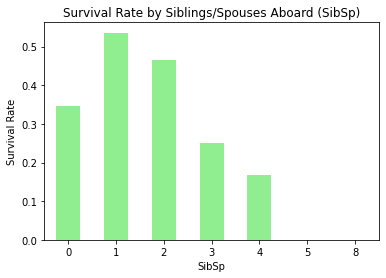

In [43]:
sibsp_survival_rates = df.groupby('SibSp')['Survived'].mean()
print(sibsp_survival_rates)
plt.figure(figsize=(8, 8))
plt.pie(sibsp_survival_rates, labels=sibsp_survival_rates.index, autopct='%1.1f%%', startangle=140)
plt.title('Survival Rate by Siblings/Spouses Aboard (SibSp)')
plt.axis('equal')
plt.show()
sibsp_survival_rates.plot(kind='bar', color='lightgreen')
plt.title('Survival Rate by Siblings/Spouses Aboard (SibSp)')
plt.xlabel('SibSp')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()



#### e. Did having parents or children aboard the Titanic influence survival rates?

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


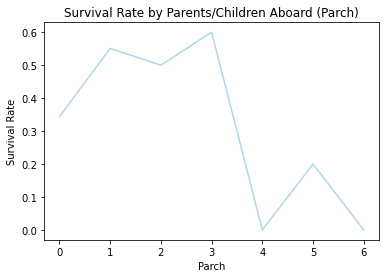

In [44]:
parch_survival_rates = df.groupby('Parch')['Survived'].mean()
print(parch_survival_rates)
parch_survival_rates.plot(kind='line', color='lightblue')
plt.title('Survival Rate by Parents/Children Aboard (Parch)')
plt.xlabel('Parch')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


## Age and Survival

#### a. What was the age distribution of passengers on the Titanic?

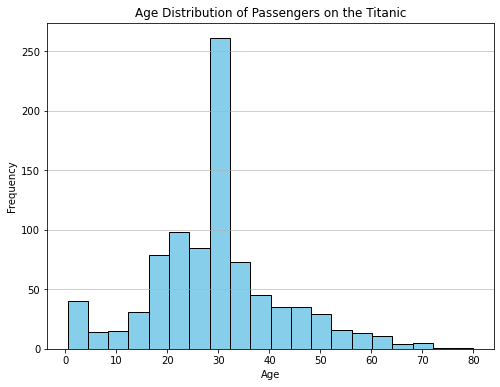

In [45]:
age_data = df['Age']
plt.figure(figsize=(8, 6))
plt.hist(age_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Passengers on the Titanic')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


#### b. Did age impact a passenger's likelihood of survival?

AgeGroup
0-19     0.458101
20-39    0.364769
40-59    0.390625
60-79    0.227273
Name: Survived, dtype: float64


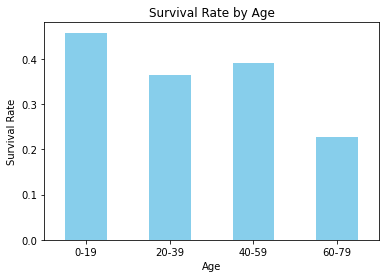

In [46]:
age_bins = [0, 20, 40, 60, 80]
age_labels = ['0-19', '20-39', '40-59', '60-79']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
age_survival_rates = df.groupby('AgeGroup')['Survived'].mean()
print(age_survival_rates)
age_survival_rates.plot(kind='bar', color='skyblue')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


#### c. Were children given priority in the lifeboats?

In [47]:
threshold_age = 18
overall_survival_rate = df['Survived'].mean()
children_survival_rate = df[df['Age'] < threshold_age]['Survived'].mean()
print(f"Overall Survival Rate: {overall_survival_rate:.2%}")
print(f"Survival Rate for Passengers Under {threshold_age} years old: {children_survival_rate:.2%}")


Overall Survival Rate: 38.38%
Survival Rate for Passengers Under 18 years old: 53.98%


## Ticket Fare and Survival

#### a. What was the distribution of ticket fares?

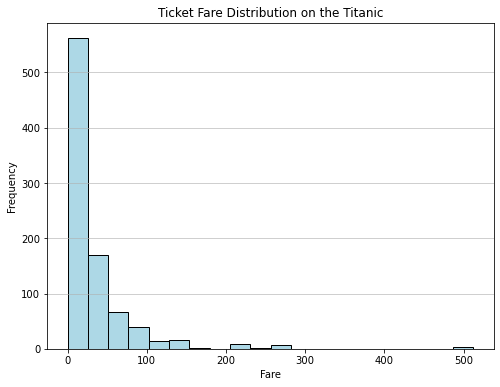

In [48]:
plt.figure(figsize=(8, 6))
plt.hist(df['Fare'], bins=20, color='lightblue', edgecolor='black')
plt.title('Ticket Fare Distribution on the Titanic')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


#### b. Did passengers who paid more for their tickets have a higher chance of survival?

FareGroup
0-29     0.319315
30-69    0.465116
70-99    0.711538
100+     0.735849
Name: Survived, dtype: float64


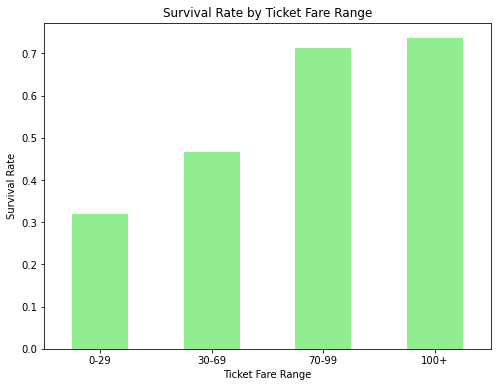

In [49]:
fare_bins = [0, 30, 70, 100, 1000]
fare_labels = ['0-29', '30-69', '70-99', '100+']
df['FareGroup'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels)
fare_survival_rates = df.groupby('FareGroup')['Survived'].mean()
print(fare_survival_rates)
plt.figure(figsize=(8, 6))
fare_survival_rates.plot(kind='bar', color='lightgreen')
plt.title('Survival Rate by Ticket Fare Range')
plt.xlabel('Ticket Fare Range')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


#### c. Did the ticket fare correlate with the passenger class?

In [50]:
fare_class_correlation = df['Fare'].corr(df['Pclass'])
print(f"Correlation between Fare and Passenger Class: {fare_class_correlation:.2f}")


Correlation between Fare and Passenger Class: -0.55


###### The correlation coefficient (fare_class_correlation) will be a value between -1 and 1. If it is close to 1, it indicates a strong positive correlation, meaning that as fare increases, the passenger class is likely to decrease. If it is close to -1, it indicates a strong negative correlation, meaning that as fare increases, the passenger class is likely to increase. If it is close to 0, it indicates a weak or no correlation.

## Port of Embarkation

#### a. How many passengers embarked from each of the three ports (Southampton, Cherbourg, and Queenstown)?

In [51]:
embarkation_counts = df['Embarked'].value_counts()
print(embarkation_counts)


S    644
C    168
Q     77
Name: Embarked, dtype: int64


#### b. Did the port of embarkation influence a passenger's survival chances?

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


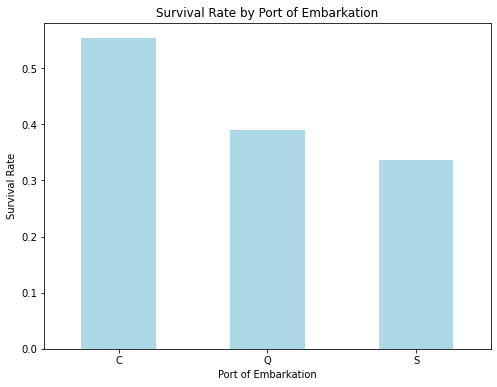

In [52]:
embarkation_survival_rates = df.groupby('Embarked')['Survived'].mean()
print(embarkation_survival_rates)
plt.figure(figsize=(8, 6))
embarkation_survival_rates.plot(kind='bar', color='lightblue')
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()


## Family Size

#### a. What was the average family size on the Titanic?

In [53]:
df['FamilySize'] = df['SibSp'] + df['Parch']
average_family_size = df['FamilySize'].mean()
print(f"The average family size on the Titanic was: {average_family_size:.2f}")


The average family size on the Titanic was: 0.90


#### b. Did passengers traveling alone have a different survival rate compared to those with family members aboard?


In [54]:
df['Alone'] = (df['SibSp'] + df['Parch']) == 0
alone_survival_rate = df[df['Alone']]['Survived'].mean()
with_family_survival_rate = df[~df['Alone']]['Survived'].mean()

print(f"Survival Rate for Passengers Traveling Alone: {alone_survival_rate:.2%}")
print(f"Survival Rate for Passengers with Family Members: {with_family_survival_rate:.2%}")


Survival Rate for Passengers Traveling Alone: 30.35%
Survival Rate for Passengers with Family Members: 50.56%


## Cabin and Deck Information

#### a. How many passengers had cabin information available in the dataset?

In [55]:
passengers_with_cabin_info = df['Cabin'].count()
print(f"The number of passengers with cabin information available: {passengers_with_cabin_info}")


The number of passengers with cabin information available: 204


#### b. Did the deck level (A, B, C, etc.) where a passenger's cabin was located affect their survival?


Deck
A          0.466667
B          0.744681
C          0.593220
D          0.757576
E          0.750000
F          0.615385
G          0.500000
T          0.000000
Unknown    0.299854
Name: Survived, dtype: float64


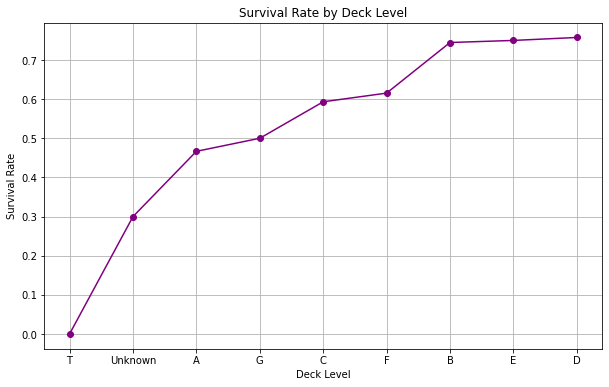

In [56]:
df['Deck'] = df['Cabin'].str.extract(r'([A-Za-z])')
df['Deck'].fillna('Unknown', inplace=True)
deck_survival_rates = df.groupby('Deck')['Survived'].mean()
print(deck_survival_rates)
plt.figure(figsize=(10, 6))
deck_survival_rates.sort_values().plot(kind='line', marker='o', color='purple')
plt.title('Survival Rate by Deck Level')
plt.xlabel('Deck Level')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()

## Name Analysis

#### a. What are the most common titles (e.g., Mr., Mrs., Miss) among passengers, and did they impact survival?

In [57]:
df['Title'] = df['Name'].str.extract(r',\s*([^\.]*)\.')
title_survival_rates = df.groupby('Title')['Survived'].mean()
most_common_titles = df['Title'].value_counts().head(5)
print("Most common titles:")
print(most_common_titles)
print("\nSurvival rates by title:")
print(title_survival_rates)


Most common titles:
Mr        517
Miss      182
Mrs       125
Master     40
Dr          7
Name: Title, dtype: int64

Survival rates by title:
Title
Capt            0.000000
Col             0.500000
Don             0.000000
Dr              0.428571
Jonkheer        0.000000
Lady            1.000000
Major           0.500000
Master          0.575000
Miss            0.697802
Mlle            1.000000
Mme             1.000000
Mr              0.156673
Mrs             0.792000
Ms              1.000000
Rev             0.000000
Sir             1.000000
the Countess    1.000000
Name: Survived, dtype: float64


#### b. Can we infer the family relationships or group affiliations from the names of passengers?

In [76]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
title_counts = df['Title'].value_counts()
print(title_counts)

df['FamilyName'] = df['Name'].apply(lambda x: x.split(',')[0])
family_name_counts = df['FamilyName'].value_counts()
print(family_name_counts)


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Don           1
Ms            1
Jonkheer      1
Sir           1
Capt          1
Countess      1
Mme           1
Lady          1
Name: Title, dtype: int64
Andersson    9
Sage         7
Skoog        6
Johnson      6
Panula       6
            ..
Fynney       1
Hanna        1
Nilsson      1
Andrew       1
Byles        1
Name: FamilyName, Length: 667, dtype: int64


## Missing Data Analysis

#### a. How much missing data is there in the dataset for various attributes, and how should it be handled?

In [63]:
missing_data = df.isnull().sum()
print("Missing data summary:")
print(missing_data)


Missing data summary:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup         0
FareGroup       15
FamilySize       0
Alone            0
Deck             0
Title            0
dtype: int64


#### b. Did the absence of certain data, like age or cabin information, impact the analysis?

#### The absence of certain data can impact the analysis, and the choice of how to handle missing data should be guided by the specific characteristics of the dataset and the goals of the analysis.

## Survival Over Time

#### a. Can we analyze if the survival rate changed over the course of the disaster?

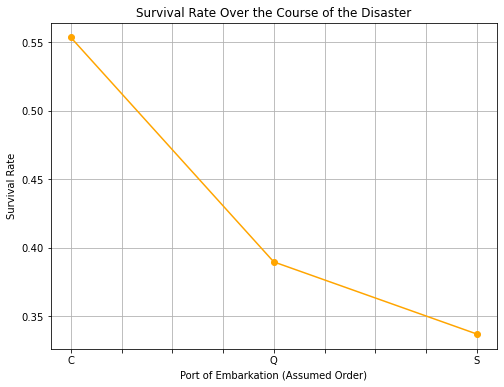

In [64]:
embarked_survival_rates = df.groupby('Embarked')['Survived'].mean()
plt.figure(figsize=(8, 6))
embarked_survival_rates.sort_index().plot(kind='line', marker='o', color='orange')
plt.title('Survival Rate Over the Course of the Disaster')
plt.xlabel('Port of Embarkation (Assumed Order)')
plt.ylabel('Survival Rate')
plt.grid(True)
plt.show()


## Interaction Effects

#### a. Can we identify any interactions between different features that had a significant impact on survival?

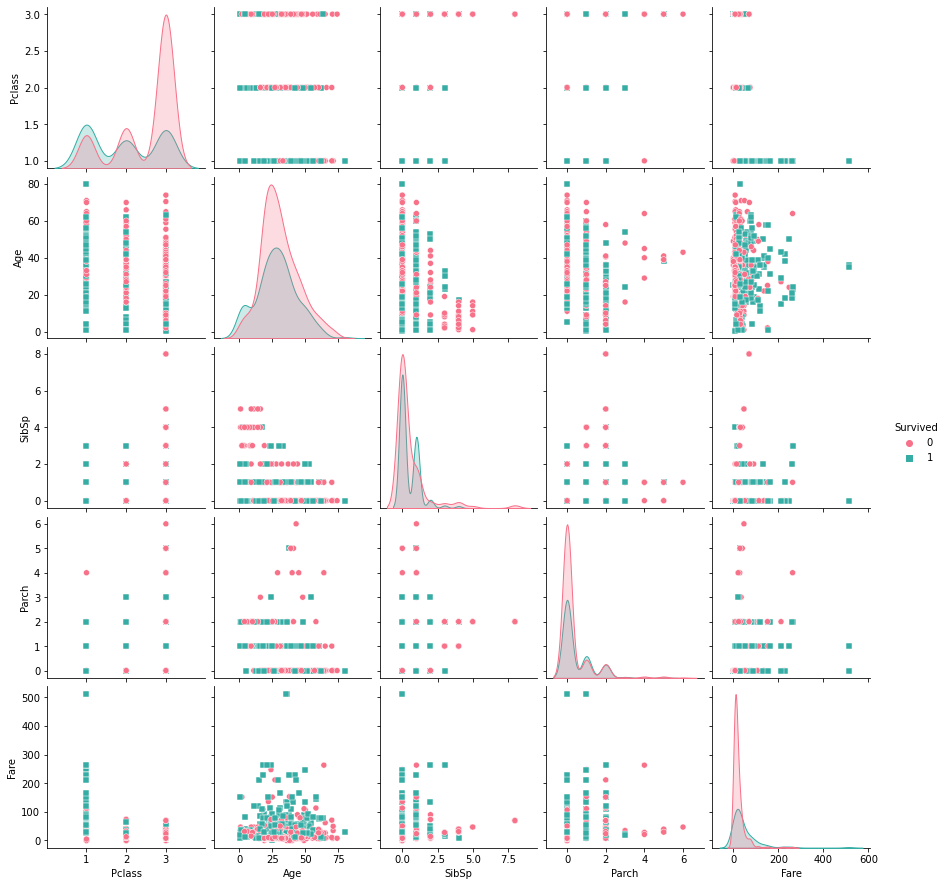

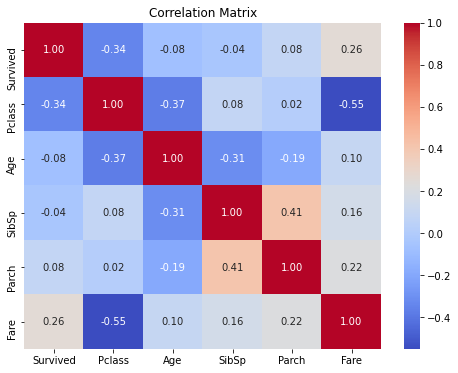

In [79]:
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']
sns.pairplot(df[selected_features], hue='Survived', palette='husl', markers=["o", "s"])
plt.show()

numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()
